# Horse or Human Classification using CNN

In [ ]:
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.regularizers import L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
train_path='/content/drive/MyDrive/mydatasets/horse-or-human/train'

In [ ]:
val_path='/content/drive/MyDrive/mydatasets/horse-or-human/validation'

# Data Preprocessing (Image Data Generator)

In [ ]:
training_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                    zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [ ]:
training_data=training_datagen.flow_from_directory(train_path,target_size=(150,150),batch_size=32,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
validation_data=training_datagen.flow_from_directory(val_path,target_size=(150,150),batch_size=32,class_mode='binary')

Found 256 images belonging to 2 classes.


#CODE SNIPPET: 
####see first 5 images from augmented data using matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,5,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

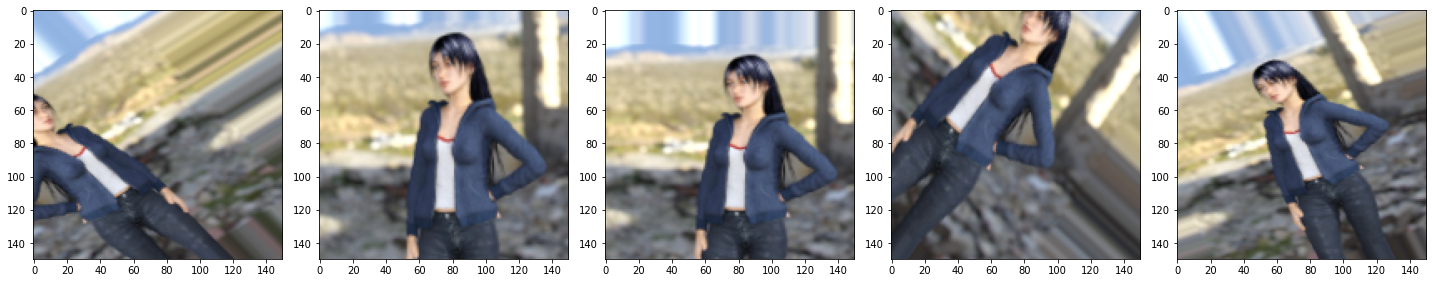

In [ ]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

# Building simple CNN model

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                        
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                                                        
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                                                     
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layer
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),# hidden layer                   
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model

cnn_model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/MyDrive/myModels/CNN/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= validation_data,
                          callbacks=callbacks_list)

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.5881
Epoch 1: val_accuracy improved from -inf to 0.53906, saving model to /content/drive/MyDrive/myModels/CNN/horse_or_human_predictor.h5
33/33 [==============================] - 124s 4s/step - loss: 0.7626 - accuracy: 0.5881 - val_loss: 0.9819 - val_accuracy: 0.5391
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.6173
Epoch 2: val_accuracy improved from 0.53906 to 0.69922, saving model to /content/drive/MyDrive/myModels/CNN/horse_or_human_predictor.h5
33/33 [==============================] - 108s 3s/step - loss: 0.7184 - accuracy: 0.6173 - val_loss: 0.5652 - val_accuracy: 0.6992
Epoch 3/20
33/33 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.6816
Epoch 3: val_accuracy did not improve from 0.69922
33/33 [==============================] - 105s 3s/step - loss: 0.6504 - accuracy: 0.6816 - val_loss: 0.6102 - val_accuracy: 0.6719
Epoch 4/

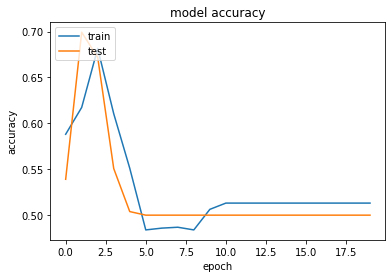

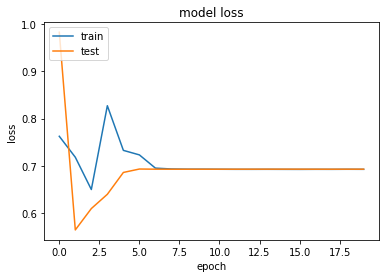

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_path='/content/drive/MyDrive/myModels/CNN/horse_or_human_predictor.h5'

In [ ]:
model=keras.models.load_model(model_path)

In [ ]:
# horse images for test
h1='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/horses/horse09-5.png'
h2='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/horses/horse11-9.png'
h3='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/horses/horse14-8.png'
h4='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/horses/horse18-4.png'
h5='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/horses/horse29-1.png'

In [ ]:
# human images for test
hu1='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/humans/human03-26.png'
hu2='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/humans/human05-22.png'
hu3='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/humans/human07-28.png'
hu4='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/humans/human10-00.png'
hu5='/content/drive/MyDrive/mydatasets/horse-or-human/horse-or-human/train/humans/human12-09.png'

In [ ]:
test=[h1,h2,h3,h4,h5,hu1,hu2,hu3,hu4,hu5]

In [ ]:
import keras.utils as image
import numpy as np

In [ ]:
def pred_human_horse(model,horse_or_human):
    test_image=image.load_img(horse_or_human,target_size=(150,150))
    test_image=image.img_to_array(test_image)/255
    test_image=np.expand_dims(test_image,axis=0)

    result=model.predict(test_image).round(2)
    pred=np.argmax(result)
    print(result,'----->',pred)

    if pred == 0:
        print('Predicted>>> Horse')
    else:
        print('Predicted>>> Human')

In [ ]:
for horse_or_human in test:
    pred_human_horse(model, horse_or_human)

1/1 [==============================] - 0s 48ms/step
[[0.52 0.48]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 45ms/step
[[0.51 0.49]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 45ms/step
[[0.71 0.29]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 79ms/step
[[0.59 0.41]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 46ms/step
[[0.9 0.1]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 50ms/step
[[0.4 0.6]] -----> 1
Predicted>>> Human
1/1 [==============================] - 0s 47ms/step
[[0.25 0.75]] -----> 1
Predicted>>> Human
1/1 [==============================] - 0s 46ms/step
[[0.61 0.39]] -----> 0
Predicted>>> Horse
1/1 [==============================] - 0s 47ms/step
[[0.29 0.71]] -----> 1
Predicted>>> Human
1/1 [==============================] - 0s 46ms/step
[[0.31 0.69]] -----> 1
Predicted>>> Human
